In [1]:
import os
import random
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import pickle
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, auc, confusion_matrix, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything(seed=42)  

In [8]:
with open('valid-pred.pkl', 'br') as f:
    pred = pickle.load(f)
lis = []
for p in pred:
    lis += p
lis

[[0.9386241436004639, 0.061375897377729416],
 [0.9998700618743896, 0.00012994679855182767],
 [0.004130895249545574, 0.9958691000938416],
 [0.005661685019731522, 0.99433833360672],
 [0.3875003755092621, 0.6124995946884155],
 [0.019004808738827705, 0.980995237827301],
 [0.008678393438458443, 0.9913216233253479],
 [0.0020721261389553547, 0.9979279041290283],
 [0.007299021352082491, 0.9927009344100952],
 [0.012953775003552437, 0.9870462417602539],
 [0.003702790942043066, 0.9962971806526184],
 [0.01401807926595211, 0.9859819412231445],
 [0.00193279969971627, 0.9980672001838684],
 [0.007374525535851717, 0.9926254153251648],
 [0.44847002625465393, 0.5515300035476685],
 [0.9927524328231812, 0.0072476183995604515],
 [0.007687025237828493, 0.9923129677772522],
 [0.18158847093582153, 0.8184115886688232],
 [0.026679255068302155, 0.9733207821846008],
 [0.06714604794979095, 0.9328539371490479],
 [0.9957231283187866, 0.004276894498616457],
 [0.0015287647256627679, 0.998471200466156],
 [0.010980157181

In [11]:
valid = pd.read_csv('classification-input-valid.csv')
len(valid), len(lis)

(68189, 68189)

In [12]:
lis = np.array(lis)
for i in range(100):
    thresh = i*0.01
    valid['pred'] = lis[:, 1] > thresh
    print(f'======={thresh}======')
    print('precision:',precision_score(valid['target'], valid['pred']), 'recall:',recall_score(valid['target'], valid['pred']), 'f1score:', f1_score(valid['target'], valid['pred']))
    display(pd.DataFrame(confusion_matrix(valid['target'], valid['pred']), index=['REACTANT_true', 'REAGENT_true'],columns=['REACTANT_pred', 'REAGENT_pred']))

=======0.0======
precision: 0.004575518045432548 recall: 1.0 f1score: 0.009109356067794632


,REACTANT_pred,REAGENT_pred
REACTANT_true,0,67877
REAGENT_true,0,312


=======0.01======
precision: 0.0561326408310028 recall: 0.9006410256410257 f1score: 0.10567882662655134


,REACTANT_pred,REAGENT_pred
REACTANT_true,63152,4725
REAGENT_true,31,281


=======0.02======
precision: 0.06080489938757655 recall: 0.8910256410256411 f1score: 0.11384111384111383


,REACTANT_pred,REAGENT_pred
REACTANT_true,63583,4294
REAGENT_true,34,278


=======0.03======
precision: 0.0632393084622384 recall: 0.8910256410256411 f1score: 0.11809685641461343


,REACTANT_pred,REAGENT_pred
REACTANT_true,63759,4118
REAGENT_true,34,278


=======0.04======
precision: 0.06447831184056271 recall: 0.8814102564102564 f1score: 0.12016604762945159


,REACTANT_pred,REAGENT_pred
REACTANT_true,63887,3990
REAGENT_true,37,275


=======0.05======
precision: 0.06538922155688623 recall: 0.875 f1score: 0.1216848673946958


,REACTANT_pred,REAGENT_pred
REACTANT_true,63975,3902
REAGENT_true,39,273


=======0.06======
precision: 0.06562955760816723 recall: 0.8653846153846154 f1score: 0.1220063262539539


,REACTANT_pred,REAGENT_pred
REACTANT_true,64033,3844
REAGENT_true,42,270


=======0.07======
precision: 0.06630515158984471 recall: 0.8621794871794872 f1score: 0.1231403067063401


,REACTANT_pred,REAGENT_pred
REACTANT_true,64089,3788
REAGENT_true,43,269


=======0.08======
precision: 0.06723319170207448 recall: 0.8621794871794872 f1score: 0.12473916067702295


,REACTANT_pred,REAGENT_pred
REACTANT_true,64145,3732
REAGENT_true,43,269


=======0.09======
precision: 0.06789500252397779 recall: 0.8621794871794872 f1score: 0.12587739822180627


,REACTANT_pred,REAGENT_pred
REACTANT_true,64184,3693
REAGENT_true,43,269


=======0.1======
precision: 0.06836086404066073 recall: 0.8621794871794872 f1score: 0.12667765481516363


,REACTANT_pred,REAGENT_pred
REACTANT_true,64211,3666
REAGENT_true,43,269


=======0.11======
precision: 0.068584639095813 recall: 0.8557692307692307 f1score: 0.12699167657550534


,REACTANT_pred,REAGENT_pred
REACTANT_true,64251,3626
REAGENT_true,45,267


=======0.12======
precision: 0.06908150064683052 recall: 0.8557692307692307 f1score: 0.1278429494852765


,REACTANT_pred,REAGENT_pred
REACTANT_true,64279,3598
REAGENT_true,45,267


=======0.13======
precision: 0.0691987513007284 recall: 0.8525641025641025 f1score: 0.12800769971126083


,REACTANT_pred,REAGENT_pred
REACTANT_true,64299,3578
REAGENT_true,46,266


=======0.14======
precision: 0.06914614981665794 recall: 0.8461538461538461 f1score: 0.1278450363196126


,REACTANT_pred,REAGENT_pred
REACTANT_true,64323,3554
REAGENT_true,48,264


=======0.15======
precision: 0.06949197157146618 recall: 0.8461538461538461 f1score: 0.12843590367307225


,REACTANT_pred,REAGENT_pred
REACTANT_true,64342,3535
REAGENT_true,48,264


=======0.16======
precision: 0.0698782424563261 recall: 0.8461538461538461 f1score: 0.12909535452322737


,REACTANT_pred,REAGENT_pred
REACTANT_true,64363,3514
REAGENT_true,48,264


=======0.17======
precision: 0.070194097314544 recall: 0.8461538461538461 f1score: 0.1296341762828382


,REACTANT_pred,REAGENT_pred
REACTANT_true,64380,3497
REAGENT_true,48,264


=======0.18======
precision: 0.07056936647955092 recall: 0.8461538461538461 f1score: 0.1302738712065137


,REACTANT_pred,REAGENT_pred
REACTANT_true,64400,3477
REAGENT_true,48,264


=======0.19======
precision: 0.07083445130131473 recall: 0.8461538461538461 f1score: 0.13072542708591237


,REACTANT_pred,REAGENT_pred
REACTANT_true,64414,3463
REAGENT_true,48,264


=======0.2======
precision: 0.0712166172106825 recall: 0.8461538461538461 f1score: 0.1313759641701916


,REACTANT_pred,REAGENT_pred
REACTANT_true,64434,3443
REAGENT_true,48,264


=======0.21======
precision: 0.07164179104477612 recall: 0.8461538461538461 f1score: 0.1320990743057293


,REACTANT_pred,REAGENT_pred
REACTANT_true,64456,3421
REAGENT_true,48,264


=======0.22======
precision: 0.07174031642116749 recall: 0.842948717948718 f1score: 0.1322272498743087


,REACTANT_pred,REAGENT_pred
REACTANT_true,64474,3403
REAGENT_true,49,263


=======0.23======
precision: 0.07189721159103335 recall: 0.842948717948718 f1score: 0.13249370277078085


,REACTANT_pred,REAGENT_pred
REACTANT_true,64482,3395
REAGENT_true,49,263


=======0.24======
precision: 0.07225274725274725 recall: 0.842948717948718 f1score: 0.13309716599190283


,REACTANT_pred,REAGENT_pred
REACTANT_true,64500,3377
REAGENT_true,49,263


=======0.25======
precision: 0.07245179063360882 recall: 0.842948717948718 f1score: 0.13343480466768137


,REACTANT_pred,REAGENT_pred
REACTANT_true,64510,3367
REAGENT_true,49,263


=======0.26======
precision: 0.07271219242466131 recall: 0.842948717948718 f1score: 0.133876304403156


,REACTANT_pred,REAGENT_pred
REACTANT_true,64523,3354
REAGENT_true,49,263


=======0.27======
precision: 0.07301499167129373 recall: 0.842948717948718 f1score: 0.13438937148696986


,REACTANT_pred,REAGENT_pred
REACTANT_true,64538,3339
REAGENT_true,49,263


=======0.28======
precision: 0.07325905292479108 recall: 0.842948717948718 f1score: 0.13480266529984622


,REACTANT_pred,REAGENT_pred
REACTANT_true,64550,3327
REAGENT_true,49,263


=======0.29======
precision: 0.07328671328671328 recall: 0.8397435897435898 f1score: 0.13480833547723178


,REACTANT_pred,REAGENT_pred
REACTANT_true,64564,3313
REAGENT_true,50,262


=======0.3======
precision: 0.07355418304323413 recall: 0.8397435897435898 f1score: 0.13526071244192048


,REACTANT_pred,REAGENT_pred
REACTANT_true,64577,3300
REAGENT_true,50,262


=======0.31======
precision: 0.07367829021372328 recall: 0.8397435897435898 f1score: 0.13547052740434332


,REACTANT_pred,REAGENT_pred
REACTANT_true,64583,3294
REAGENT_true,50,262


=======0.32======
precision: 0.0738652382294897 recall: 0.8397435897435898 f1score: 0.1357864731795802


,REACTANT_pred,REAGENT_pred
REACTANT_true,64592,3285
REAGENT_true,50,262


=======0.33======
precision: 0.07407407407407407 recall: 0.8397435897435898 f1score: 0.1361392569498571


,REACTANT_pred,REAGENT_pred
REACTANT_true,64602,3275
REAGENT_true,50,262


=======0.34======
precision: 0.07434733257661748 recall: 0.8397435897435898 f1score: 0.13660062565172054


,REACTANT_pred,REAGENT_pred
REACTANT_true,64615,3262
REAGENT_true,50,262


=======0.35000000000000003======
precision: 0.0746226146397038 recall: 0.8397435897435898 f1score: 0.13706513209521318


,REACTANT_pred,REAGENT_pred
REACTANT_true,64628,3249
REAGENT_true,50,262


=======0.36======
precision: 0.07472903593839134 recall: 0.8397435897435898 f1score: 0.13724463069669987


,REACTANT_pred,REAGENT_pred
REACTANT_true,64633,3244
REAGENT_true,50,262


=======0.37======
precision: 0.07498568975386377 recall: 0.8397435897435898 f1score: 0.13767735155018393


,REACTANT_pred,REAGENT_pred
REACTANT_true,64645,3232
REAGENT_true,50,262


=======0.38======
precision: 0.07509314989968473 recall: 0.8397435897435898 f1score: 0.13785845830044724


,REACTANT_pred,REAGENT_pred
REACTANT_true,64650,3227
REAGENT_true,50,262


=======0.39======
precision: 0.07510791366906475 recall: 0.8365384615384616 f1score: 0.137839978875099


,REACTANT_pred,REAGENT_pred
REACTANT_true,64663,3214
REAGENT_true,51,261


=======0.4======
precision: 0.07530294287362954 recall: 0.8365384615384616 f1score: 0.13816834303864478


,REACTANT_pred,REAGENT_pred
REACTANT_true,64672,3205
REAGENT_true,51,261


=======0.41000000000000003======
precision: 0.07556456282570932 recall: 0.8365384615384616 f1score: 0.13860860329261815


,REACTANT_pred,REAGENT_pred
REACTANT_true,64684,3193
REAGENT_true,51,261


=======0.42======
precision: 0.07585004359197908 recall: 0.8365384615384616 f1score: 0.1390887290167866


,REACTANT_pred,REAGENT_pred
REACTANT_true,64697,3180
REAGENT_true,51,261


=======0.43======
precision: 0.07604895104895106 recall: 0.8365384615384616 f1score: 0.13942307692307693


,REACTANT_pred,REAGENT_pred
REACTANT_true,64706,3171
REAGENT_true,51,261


=======0.44======
precision: 0.07620437956204379 recall: 0.8365384615384616 f1score: 0.13968423869413968


,REACTANT_pred,REAGENT_pred
REACTANT_true,64713,3164
REAGENT_true,51,261


=======0.45======
precision: 0.07638279192273925 recall: 0.8365384615384616 f1score: 0.13998390989541434


,REACTANT_pred,REAGENT_pred
REACTANT_true,64721,3156
REAGENT_true,51,261


=======0.46======
precision: 0.07669703203056127 recall: 0.8365384615384616 f1score: 0.1405114401076716


,REACTANT_pred,REAGENT_pred
REACTANT_true,64735,3142
REAGENT_true,51,261


=======0.47000000000000003======
precision: 0.07694575471698113 recall: 0.8365384615384616 f1score: 0.14092872570194384


,REACTANT_pred,REAGENT_pred
REACTANT_true,64746,3131
REAGENT_true,51,261


=======0.48======
precision: 0.07715045817321904 recall: 0.8365384615384616 f1score: 0.14127198917456021


,REACTANT_pred,REAGENT_pred
REACTANT_true,64755,3122
REAGENT_true,51,261


=======0.49======
precision: 0.07742509641056067 recall: 0.8365384615384616 f1score: 0.14173228346456693


,REACTANT_pred,REAGENT_pred
REACTANT_true,64767,3110
REAGENT_true,51,261


=======0.5======
precision: 0.07770169693361119 recall: 0.8365384615384616 f1score: 0.14219558703350585


,REACTANT_pred,REAGENT_pred
REACTANT_true,64779,3098
REAGENT_true,51,261


=======0.51======
precision: 0.07786396181384249 recall: 0.8365384615384616 f1score: 0.14246724890829696


,REACTANT_pred,REAGENT_pred
REACTANT_true,64786,3091
REAGENT_true,51,261


=======0.52======
precision: 0.07819053325344517 recall: 0.8365384615384616 f1score: 0.143013698630137


,REACTANT_pred,REAGENT_pred
REACTANT_true,64800,3077
REAGENT_true,51,261


=======0.53======
precision: 0.07842548076923077 recall: 0.8365384615384616 f1score: 0.1434065934065934


,REACTANT_pred,REAGENT_pred
REACTANT_true,64810,3067
REAGENT_true,51,261


=======0.54======
precision: 0.07859078590785908 recall: 0.8365384615384616 f1score: 0.14368290668868702


,REACTANT_pred,REAGENT_pred
REACTANT_true,64817,3060
REAGENT_true,51,261


=======0.55======
precision: 0.07882814859559045 recall: 0.8365384615384616 f1score: 0.14407949213359095


,REACTANT_pred,REAGENT_pred
REACTANT_true,64827,3050
REAGENT_true,51,261


=======0.56======
precision: 0.07881176113973931 recall: 0.8333333333333334 f1score: 0.14400443090556633


,REACTANT_pred,REAGENT_pred
REACTANT_true,64838,3039
REAGENT_true,52,260


=======0.5700000000000001======
precision: 0.07907542579075426 recall: 0.8333333333333334 f1score: 0.14444444444444443


,REACTANT_pred,REAGENT_pred
REACTANT_true,64849,3028
REAGENT_true,52,260


=======0.58======
precision: 0.07929246721561452 recall: 0.8333333333333334 f1score: 0.14480646059593427


,REACTANT_pred,REAGENT_pred
REACTANT_true,64858,3019
REAGENT_true,52,260


=======0.59======
precision: 0.0794135613927917 recall: 0.8333333333333334 f1score: 0.1450083658672616


,REACTANT_pred,REAGENT_pred
REACTANT_true,64863,3014
REAGENT_true,52,260


=======0.6======
precision: 0.07965686274509803 recall: 0.8333333333333334 f1score: 0.145413870246085


,REACTANT_pred,REAGENT_pred
REACTANT_true,64873,3004
REAGENT_true,52,260


=======0.61======
precision: 0.0796188134030126 recall: 0.8301282051282052 f1score: 0.14530154277699858


,REACTANT_pred,REAGENT_pred
REACTANT_true,64883,2994
REAGENT_true,53,259


=======0.62======
precision: 0.07953144266337854 recall: 0.8269230769230769 f1score: 0.1451068616422947


,REACTANT_pred,REAGENT_pred
REACTANT_true,64891,2986
REAGENT_true,54,258


=======0.63======
precision: 0.07964053300278896 recall: 0.8237179487179487 f1score: 0.14523876801356317


,REACTANT_pred,REAGENT_pred
REACTANT_true,64907,2970
REAGENT_true,55,257


=======0.64======
precision: 0.07945375543140906 recall: 0.8205128205128205 f1score: 0.144878324844369


,REACTANT_pred,REAGENT_pred
REACTANT_true,64911,2966
REAGENT_true,56,256


=======0.65======
precision: 0.07965152457996266 recall: 0.8205128205128205 f1score: 0.14520703346568348


,REACTANT_pred,REAGENT_pred
REACTANT_true,64919,2958
REAGENT_true,56,256


=======0.66======
precision: 0.07995003123048094 recall: 0.8205128205128205 f1score: 0.14570290267501423


,REACTANT_pred,REAGENT_pred
REACTANT_true,64931,2946
REAGENT_true,56,256


=======0.67======
precision: 0.07959887182701347 recall: 0.8141025641025641 f1score: 0.1450185555238367


,REACTANT_pred,REAGENT_pred
REACTANT_true,64940,2937
REAGENT_true,58,254


=======0.68======
precision: 0.0798240100565682 recall: 0.8141025641025641 f1score: 0.1453921007441328


,REACTANT_pred,REAGENT_pred
REACTANT_true,64949,2928
REAGENT_true,58,254


=======0.6900000000000001======
precision: 0.08010091453800063 recall: 0.8141025641025641 f1score: 0.14585127763422337


,REACTANT_pred,REAGENT_pred
REACTANT_true,64960,2917
REAGENT_true,58,254


=======0.7000000000000001======
precision: 0.08035431825371718 recall: 0.8141025641025641 f1score: 0.14627123524330551


,REACTANT_pred,REAGENT_pred
REACTANT_true,64970,2907
REAGENT_true,58,254


=======0.71======
precision: 0.08050713153724247 recall: 0.8141025641025641 f1score: 0.14652437265647533


,REACTANT_pred,REAGENT_pred
REACTANT_true,64976,2901
REAGENT_true,58,254


=======0.72======
precision: 0.0809174896463842 recall: 0.8141025641025641 f1score: 0.14720370906983482


,REACTANT_pred,REAGENT_pred
REACTANT_true,64992,2885
REAGENT_true,58,254


=======0.73======
precision: 0.08088235294117647 recall: 0.8108974358974359 f1score: 0.14709302325581394


,REACTANT_pred,REAGENT_pred
REACTANT_true,65002,2875
REAGENT_true,59,253


=======0.74======
precision: 0.08116778954122554 recall: 0.8108974358974359 f1score: 0.14756488772236803


,REACTANT_pred,REAGENT_pred
REACTANT_true,65013,2864
REAGENT_true,59,253


=======0.75======
precision: 0.08137664844001287 recall: 0.8108974358974359 f1score: 0.14790996784565916


,REACTANT_pred,REAGENT_pred
REACTANT_true,65021,2856
REAGENT_true,59,253


=======0.76======
precision: 0.08177117000646413 recall: 0.8108974358974359 f1score: 0.14856136230182032


,REACTANT_pred,REAGENT_pred
REACTANT_true,65036,2841
REAGENT_true,59,253


=======0.77======
precision: 0.08184475479051641 recall: 0.8076923076923077 f1score: 0.14862872309053377


,REACTANT_pred,REAGENT_pred
REACTANT_true,65050,2827
REAGENT_true,60,252


=======0.78======
precision: 0.08208469055374593 recall: 0.8076923076923077 f1score: 0.14902424600827913


,REACTANT_pred,REAGENT_pred
REACTANT_true,65059,2818
REAGENT_true,60,252


=======0.79======
precision: 0.0825147347740668 recall: 0.8076923076923077 f1score: 0.14973262032085563


,REACTANT_pred,REAGENT_pred
REACTANT_true,65075,2802
REAGENT_true,60,252


=======0.8======
precision: 0.0826201448321264 recall: 0.8044871794871795 f1score: 0.14985074626865671


,REACTANT_pred,REAGENT_pred
REACTANT_true,65090,2787
REAGENT_true,61,251


=======0.81======
precision: 0.08228684732319894 recall: 0.7980769230769231 f1score: 0.14919113241461954


,REACTANT_pred,REAGENT_pred
REACTANT_true,65100,2777
REAGENT_true,63,249


=======0.8200000000000001======
precision: 0.08236466290269014 recall: 0.7948717948717948 f1score: 0.14926271441468553


,REACTANT_pred,REAGENT_pred
REACTANT_true,65114,2763
REAGENT_true,64,248


=======0.8300000000000001======
precision: 0.08277703604806408 recall: 0.7948717948717948 f1score: 0.14993954050785974


,REACTANT_pred,REAGENT_pred
REACTANT_true,65129,2748
REAGENT_true,64,248


=======0.84======
precision: 0.08341742347796838 recall: 0.7948717948717948 f1score: 0.15098934550989343


,REACTANT_pred,REAGENT_pred
REACTANT_true,65152,2725
REAGENT_true,64,248


=======0.85======
precision: 0.08361543669600542 recall: 0.7916666666666666 f1score: 0.15125535823637476


,REACTANT_pred,REAGENT_pred
REACTANT_true,65170,2707
REAGENT_true,65,247


=======0.86======
precision: 0.08398770911573916 recall: 0.7884615384615384 f1score: 0.15180499845726628


,REACTANT_pred,REAGENT_pred
REACTANT_true,65194,2683
REAGENT_true,66,246


=======0.87======
precision: 0.08416351769151495 recall: 0.7852564102564102 f1score: 0.1520322680732237


,REACTANT_pred,REAGENT_pred
REACTANT_true,65211,2666
REAGENT_true,67,245


=======0.88======
precision: 0.08417041912019398 recall: 0.7788461538461539 f1score: 0.1519224757736793


,REACTANT_pred,REAGENT_pred
REACTANT_true,65233,2644
REAGENT_true,69,243


=======0.89======
precision: 0.08432470258922323 recall: 0.7724358974358975 f1score: 0.15205047318611986


,REACTANT_pred,REAGENT_pred
REACTANT_true,65260,2617
REAGENT_true,71,241


=======0.9======
precision: 0.08406923348640057 recall: 0.7628205128205128 f1score: 0.15144766146993316


,REACTANT_pred,REAGENT_pred
REACTANT_true,65284,2593
REAGENT_true,74,238


=======0.91======
precision: 0.08422174840085288 recall: 0.7596153846153846 f1score: 0.15163147792706336


,REACTANT_pred,REAGENT_pred
REACTANT_true,65300,2577
REAGENT_true,75,237


=======0.92======
precision: 0.08485499462943072 recall: 0.7596153846153846 f1score: 0.15265700483091788


,REACTANT_pred,REAGENT_pred
REACTANT_true,65321,2556
REAGENT_true,75,237


=======0.93======
precision: 0.08590068865530989 recall: 0.7596153846153846 f1score: 0.15434711820253988


,REACTANT_pred,REAGENT_pred
REACTANT_true,65355,2522
REAGENT_true,75,237


=======0.9400000000000001======
precision: 0.08593463092177746 recall: 0.75 f1score: 0.1542009884678748


,REACTANT_pred,REAGENT_pred
REACTANT_true,65388,2489
REAGENT_true,78,234


=======0.9500000000000001======
precision: 0.08650260999254288 recall: 0.7435897435897436 f1score: 0.15497661990647962


,REACTANT_pred,REAGENT_pred
REACTANT_true,65427,2450
REAGENT_true,80,232


=======0.96======
precision: 0.08672499049068087 recall: 0.7307692307692307 f1score: 0.1550493029581775


,REACTANT_pred,REAGENT_pred
REACTANT_true,65476,2401
REAGENT_true,84,228


=======0.97======
precision: 0.08775351014040561 recall: 0.7211538461538461 f1score: 0.15646731571627262


,REACTANT_pred,REAGENT_pred
REACTANT_true,65538,2339
REAGENT_true,87,225


=======0.98======
precision: 0.08729192042224929 recall: 0.6891025641025641 f1score: 0.15495495495495495


,REACTANT_pred,REAGENT_pred
REACTANT_true,65629,2248
REAGENT_true,97,215


=======0.99======
precision: 0.078196872125115 recall: 0.5448717948717948 f1score: 0.13676588897827835


,REACTANT_pred,REAGENT_pred
REACTANT_true,65873,2004
REAGENT_true,142,170


In [6]:
threshs = []
tprs = []
fprs = []
for i in range(0, 10001):
    thresh = i*0.0001
    valid['pred'] = lis[:, 1] > thresh
    threshs.append(thresh)
    cm = confusion_matrix(valid['target'], valid['pred'])

    TP = cm[0, 0]
    TN = cm[1, 1]
    FP = cm[1, 0]
    FN = cm[0, 1]

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    tprs.append(TPR)
    fprs.append(FPR)


Text(0, 0.5, 'TPR')

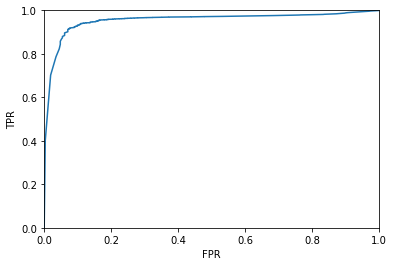

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(fprs, tprs)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

In [9]:
threshs = []
aucs = []
for i in range(0, 10001):
    thresh = i*0.0001
    valid['pred'] = lis[:, 1] > thresh
    threshs.append(thresh)
    score = auc(valid['target'], valid['pred'])
    aucs.append(score)

Text(0, 0.5, 'AUC')

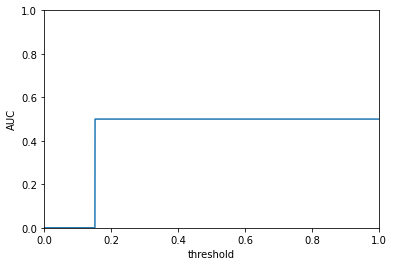

In [17]:
fig, ax = plt.subplots(1, 1)
ax.plot(threshs[::-1], aucs)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.set_xlabel('threshold')
ax.set_ylabel('AUC')

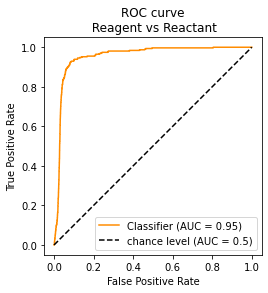

In [18]:
RocCurveDisplay.from_predictions(
    valid['target'],
    lis[:, 1],
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve\n Reagent vs Reactant")
plt.legend()
plt.show()

In [6]:
train['target'] *= -1
train['target'] += 1
valid['target'] *= -1
valid['target'] += 1
train['target'].value_counts()

0    610886
1      2807
Name: target, dtype: int64

In [10]:
model = RandomForestClassifier(max_depth=2, random_state=42)
model.fit(train[[str(i) for i in range(dim)]], train['target'])
pred = model.predict(valid[[str(i) for i in range(dim)]])
print('precision:',precision_score(valid['target'], pred), 'recall:',recall_score(valid['target'], pred), 'f1score:', f1_score(valid['target'], pred))
pd.DataFrame(confusion_matrix(valid['target'], pred), index=['REAGENT_true', 'REACTANT_true'],columns=['REAGENT_pred', 'REACTANT_pred'])

precision: 0.0 recall: 0.0 f1score: 0.0


,REAGENT_pred,REACTANT_pred
REAGENT_true,67877,0
REACTANT_true,312,0


In [11]:
train_c = train.copy()

In [12]:
pd.concat([train, train[train['target'] == 1].sample(n=len(train[train['target'] == 1])*10, replace=True)])['target'].value_counts()

0    610886
1     30877
Name: target, dtype: int64

In [14]:
model = RandomForestClassifier(max_depth=2, random_state=42)
train_data = pd.concat([train, train[train['target'] == 1].sample(n=len(train[train['target'] == 1])*100, replace=True)])
model.fit(train_data[[str(i) for i in range(dim)]], train_data['target'])
pred = model.predict(valid[[str(i) for i in range(dim)]])
print('precision:',precision_score(valid['target'], pred), 'recall:',recall_score(valid['target'], pred), 'f1score:', f1_score(valid['target'], pred))
pd.DataFrame(confusion_matrix(valid['target'], pred), index=['REAGENT_true', 'REACTANT_true'],columns=['REAGENT_pred', 'REACTANT_pred'])

precision: 0.044920235096557515 recall: 0.6858974358974359 f1score: 0.08431836091410559


,REAGENT_pred,REACTANT_pred
REAGENT_true,63327,4550
REACTANT_true,98,214


In [16]:
import optuna
train_data = pd.concat([train, train[train['target'] == 1].sample(n=len(train[train['target'] == 1])*100, replace=True)]).sample(frac=0.05)

def objective(trial):
    n_estimators=trial.suggest_int('n_estimators', 10, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 1000)
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(train_data[[str(i) for i in range(dim)]], train_data['target'])
    pred = model.predict(valid[[str(i) for i in range(dim)]])
    score =  f1_score(valid['target'], pred)
    return 1 - score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2023-01-14 10:59:02,924] A new study created in memory with name: no-name-61901d7e-8f17-4dbe-82e9-76157f02244a
[I 2023-01-14 10:59:22,200] Trial 0 finished with value: 0.8953807213668002 and parameters: {'n_estimators': 320, 'max_depth': 151}. Best is trial 0 with value: 0.8953807213668002.
[I 2023-01-14 11:00:16,186] Trial 1 finished with value: 0.8951137320977254 and parameters: {'n_estimators': 898, 'max_depth': 170}. Best is trial 1 with value: 0.8951137320977254.
[I 2023-01-14 11:01:02,389] Trial 2 finished with value: 0.8960437710437711 and parameters: {'n_estimators': 771, 'max_depth': 145}. Best is trial 1 with value: 0.8951137320977254.
[I 2023-01-14 11:01:30,190] Trial 3 finished with value: 0.894869638351556 and parameters: {'n_estimators': 462, 'max_depth': 510}. Best is trial 3 with value: 0.894869638351556.
[I 2023-01-14 11:02:12,717] Trial 4 finished with value: 0.8952020202020202 and parameters: {'n_estimators': 708, 'max_depth': 354}. Best is trial 3 with value: 0.8

In [17]:
study.best_params, study.best_value

({'n_estimators': 462, 'max_depth': 510}, 0.894869638351556)

In [18]:
model = RandomForestClassifier(**study.best_params, random_state=42)
train_data = pd.concat([train, train[train['target'] == 1].sample(n=len(train[train['target'] == 1])*100, replace=True)])
model.fit(train_data[[str(i) for i in range(dim)]], train_data['target'])
pred = model.predict(valid[[str(i) for i in range(dim)]])
print('precision:',precision_score(valid['target'], pred), 'recall:',recall_score(valid['target'], pred), 'f1score:', f1_score(valid['target'], pred))
pd.DataFrame(confusion_matrix(valid['target'], pred), index=['REAGENT_true', 'REACTANT_true'],columns=['REAGENT_pred', 'REACTANT_pred'])

precision: 0.06544077879935101 recall: 0.38782051282051283 f1score: 0.1119851920407219


,REAGENT_pred,REACTANT_pred
REAGENT_true,66149,1728
REACTANT_true,191,121


In [1]:
fingerprints = []
dim = 150
for idx, row in train.iterrows():
    mol = Chem.MolFromSmiles(row['smiles'])
    fingerprints.append(np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, dim)))
train[[str(i) for i in range(dim)]] = fingerprints
fingerprints = []
for idx, row in valid.iterrows():
    mol = Chem.MolFromSmiles(row['smiles'])
    fingerprints.append(np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, dim)))
valid[[str(i) for i in range(dim)]] = fingerprints
valid

NameError: name 'train' is not defined

In [26]:
model = RandomForestClassifier(max_depth=2, random_state=42)
train_data = pd.concat([train, train[train['target'] == 1].sample(n=len(train[train['target'] == 1])*200, replace=True)])
model.fit(train_data[[str(i) for i in range(dim)]], train_data['target'])
pred = model.predict(valid[[str(i) for i in range(dim)]])
print('precision:',precision_score(valid['target'], pred), 'recall:',recall_score(valid['target'], pred), 'f1score', f1_score(valid['target'], pred))
pd.DataFrame(confusion_matrix(valid['target'], pred), index=['REAGENT_true', 'REACTANT_true'],columns=['REAGENT_pred', 'REACTANT_pred'])

precision: 0.02114408734430263 recall: 0.8814102564102564 f1score 0.041297492115933324


,REAGENT_pred,REACTANT_pred
REAGENT_true,55146,12731
REACTANT_true,37,275


In [35]:
fingerprints = []
dim = 200
for idx, row in train.iterrows():
    mol = Chem.MolFromSmiles(row['smiles'])
    fingerprints.append(np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, dim)))
train[[str(i) for i in range(dim)]] = fingerprints
fingerprints = []
for idx, row in valid.iterrows():
    mol = Chem.MolFromSmiles(row['smiles'])
    fingerprints.append(np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, dim)))
# valid[[str(i) for i in range(dim)]] = fingerprints
dim = 100
model = RandomForestClassifier(max_depth=2, random_state=42)
train_data = pd.concat([train, train[train['target'] == 1].sample(n=len(train[train['target'] == 1])*100, replace=True)])
model.fit(train_data[[str(i) for i in range(dim)]], train_data['target'])
pred = model.predict(valid[[str(i) for i in range(dim)]])
print('precision:',precision_score(valid['target'], pred), 'recall:',recall_score(valid['target'], pred), 'f1score:', f1_score(valid['target'], pred))
pd.DataFrame(confusion_matrix(valid['target'], pred), index=['REAGENT_true', 'REACTANT_true'],columns=['REAGENT_pred', 'REACTANT_pred'])

precision: 0.2182741116751269 recall: 0.41346153846153844 f1score: 0.2857142857142857


,REAGENT_pred,REACTANT_pred
REAGENT_true,67415,462
REACTANT_true,183,129


In [40]:
import optuna
train_data = pd.concat([train, train[train['target'] == 1].sample(n=len(train[train['target'] == 1])*100, replace=True)]).sample(frac=0.05)
dim = 100
def objective(trial):
    n_estimators=trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 1000)
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(train_data[[str(i) for i in range(dim)]], train_data['target'])
    pred = model.predict(valid[[str(i) for i in range(dim)]])
    score =  f1_score(valid['target'], pred)
    return 1 - score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2023-01-14 12:54:16,551] A new study created in memory with name: no-name-21624416-1fcb-4f9b-b3e7-91794268e8ed
[I 2023-01-14 12:54:58,793] Trial 0 finished with value: 0.9032992036405005 and parameters: {'n_estimators': 695, 'max_depth': 278}. Best is trial 0 with value: 0.9032992036405005.
[I 2023-01-14 12:55:49,506] Trial 1 finished with value: 0.9031155015197568 and parameters: {'n_estimators': 834, 'max_depth': 118}. Best is trial 1 with value: 0.9031155015197568.
[I 2023-01-14 12:56:26,621] Trial 2 finished with value: 0.9034587609274041 and parameters: {'n_estimators': 610, 'max_depth': 869}. Best is trial 1 with value: 0.9031155015197568.
[I 2023-01-14 12:56:39,350] Trial 3 finished with value: 0.9047080979284369 and parameters: {'n_estimators': 209, 'max_depth': 440}. Best is trial 1 with value: 0.9031155015197568.
[I 2023-01-14 12:57:03,335] Trial 4 finished with value: 0.9037331817320448 and parameters: {'n_estimators': 389, 'max_depth': 569}. Best is trial 1 with value: 0

In [43]:
model = RandomForestClassifier(**study.best_params, random_state=42)
train_data = pd.concat([train, train[train['target'] == 1].sample(n=len(train[train['target'] == 1])*100, replace=True)])
model.fit(train_data[[str(i) for i in range(dim)]], train_data['target'])
pred = model.predict(valid[[str(i) for i in range(dim)]])
print('precision:',precision_score(valid['target'], pred), 'recall:',recall_score(valid['target'], pred), 'f1score:', f1_score(valid['target'], pred))
pd.DataFrame(confusion_matrix(valid['target'], pred), index=['REAGENT_true', 'REACTANT_true'],columns=['REAGENT_pred', 'REACTANT_pred'])

precision: 0.06396484375 recall: 0.4198717948717949 f1score: 0.11101694915254237


,REAGENT_pred,REACTANT_pred
REAGENT_true,65960,1917
REACTANT_true,181,131


In [42]:
study.best_params

{'n_estimators': 731, 'max_depth': 101}